# Decision Tree Classifier

In [1]:
#1. splitting/partitioning the data into smaller subsets

#2. select the best variable or feature for the split

#3 .Applying the split based on the rules obtained from the variables

#4 Repeating the process for the subsets obtained

#5 Continuing the process until the stopping criterion is reached

#6 Assigning the majority class/average value as the prediction

## Greedy Approach

#### It tries to maximize the immediate effect at a node while splitting that means it only focuses on that particalar node to get the maximum benefit, it does not take into account what will happen in the next two or three steps

### The entire structure of the tree changes with small variations in the input data so that will change the decisions also.

# Heart Disease Prediction

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart_prediction.csv')

In [4]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [6]:
df.shape

(270, 5)

In [7]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [8]:
df.columns


Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [9]:
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [10]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

### Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt=DecisionTreeClassifier(max_depth=3)

In [15]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [16]:
!pip install six

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [17]:
!pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
  Using cached pydotplus-2.0.2.tar.gz (278 kB)
Using legacy 'setup.py install' for pydotplus, since package 'wheel' is not installed.
    Running setup.py install for pydotplus: started
    Running setup.py install for pydotplus: finished with status 'done'


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [18]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

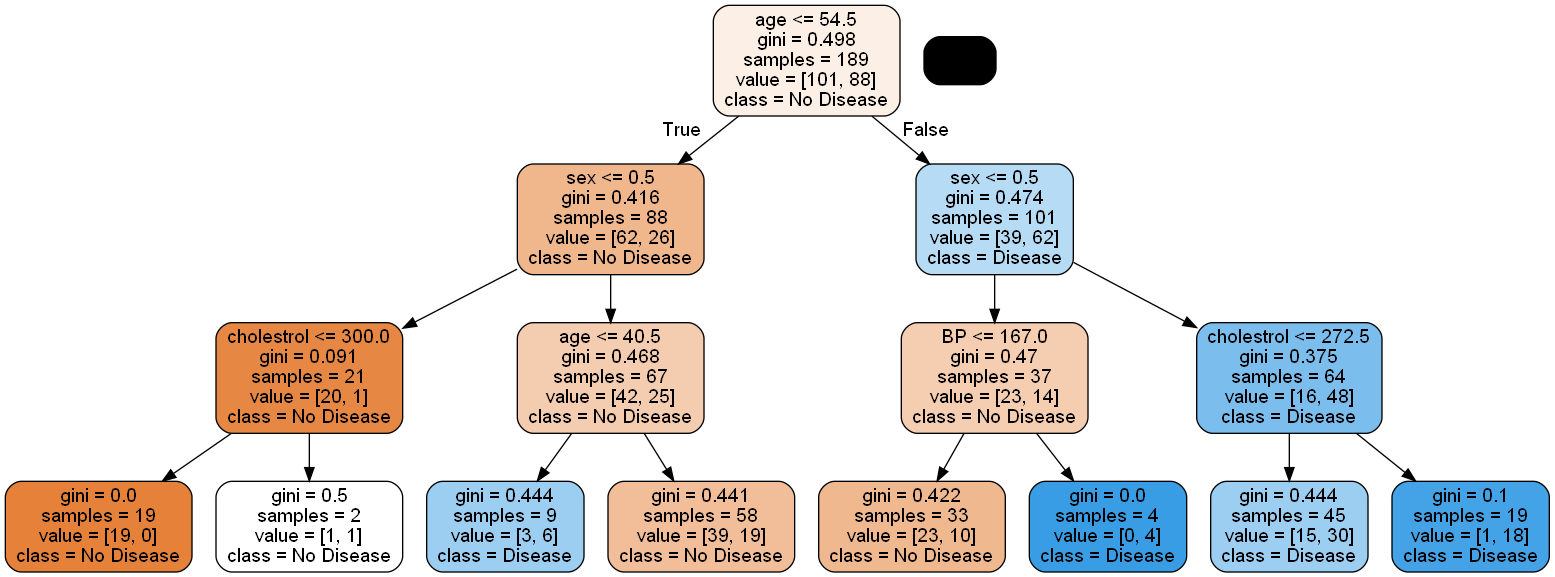

In [22]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

## Creating helper functions to evaluate model performance and help to plot the decision tree

In [21]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()  

    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [23]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

### Specifying minimum samples before split

In [24]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20)

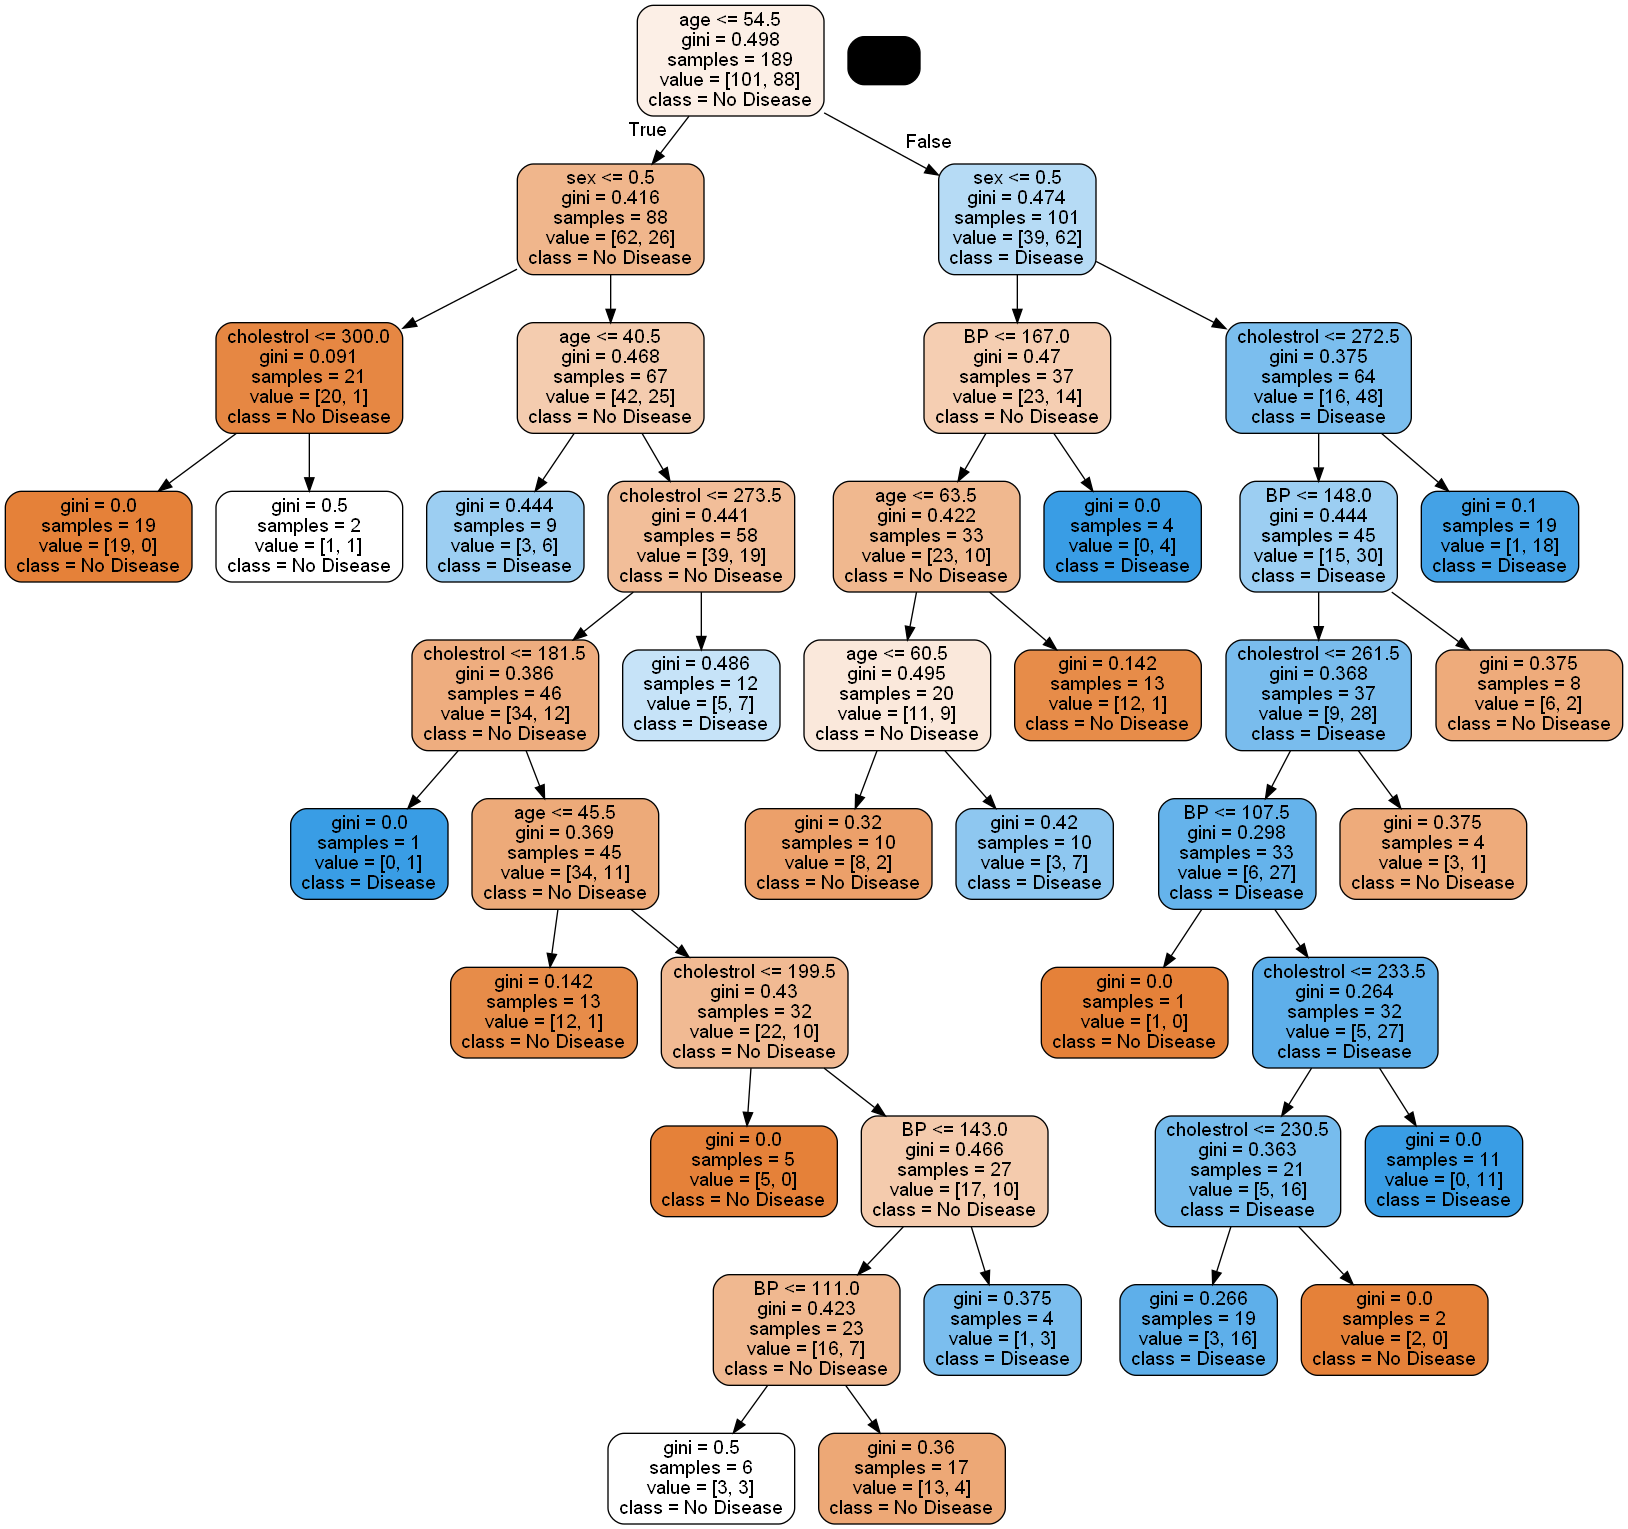

In [25]:
gph = get_dt_graph(dt_min_split) 
Image(gph.create_png())

In [26]:
from sklearn.metrics import accuracy_score
evaluate_model(dt_min_split)

Train Accuracy : 0.8359788359788359
Train Confusion Matrix:
[[85 16]
 [15 73]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[32 17]
 [12 20]]


### Specifying minimum samples in leaf node

In [27]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

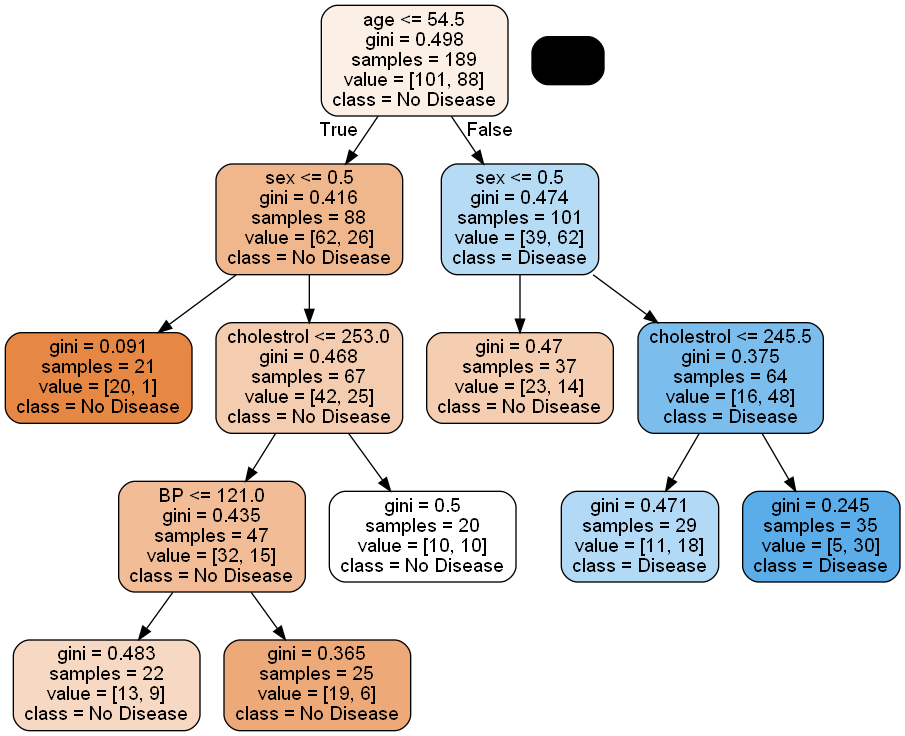

In [28]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [29]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


### Using Entropy instead of Gini

In [30]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

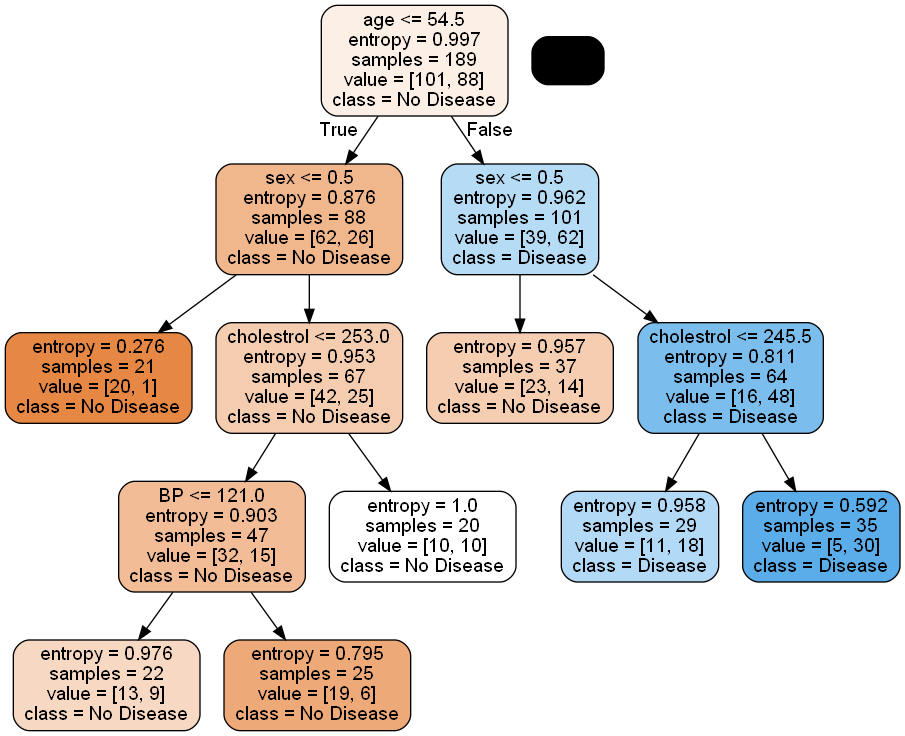

In [31]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [32]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


### Hyper-parameter tuning

In [33]:
dt = DecisionTreeClassifier(random_state=42)

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    'min_samples_split':[5,10,15,20]}

In [36]:
# grid_search = GridSearchCV(estimator=dt, 
#                            param_grid=params, 
#                            cv=4, n_jobs=-1, verbose=1, scoring = "f1")

In [37]:
grid_search=GridSearchCV(dt,param_grid=params,cv=4,n_jobs=-1,verbose=1, 
                         scoring = "accuracy")

In [38]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 200 candidates, totalling 800 fits
Wall time: 4.04 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [5, 10, 15, 20]},
             scoring='accuracy', verbose=1)

In [39]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 15}

In [40]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=15, random_state=42)

In [41]:
grid_search.best_score_

0.6722074468085106

In [42]:
grid_search.cv_results_

{'mean_fit_time': array([0.00374961, 0.00324965, 0.00299948, 0.00300002, 0.00274968,
        0.0022499 , 0.00287759, 0.00257409, 0.0015018 , 0.00246948,
        0.00175005, 0.00215346, 0.00172263, 0.00231671, 0.00263876,
        0.00150412, 0.00144935, 0.00149983, 0.00216979, 0.00172478,
        0.00223178, 0.00224984, 0.00224984, 0.00291538, 0.00282729,
        0.00239509, 0.00227016, 0.00279295, 0.00345659, 0.00289106,
        0.00229347, 0.00195658, 0.00185841, 0.00273103, 0.00244516,
        0.00197315, 0.00200003, 0.00146854, 0.00219506, 0.00203323,
        0.00256485, 0.00224996, 0.00324976, 0.00300014, 0.00225008,
        0.00200003, 0.00257033, 0.00200009, 0.0022499 , 0.00249994,
        0.00199991, 0.00200033, 0.0022499 , 0.00190187, 0.00177073,
        0.00225037, 0.00244117, 0.00248474, 0.00250006, 0.00224972,
        0.0030002 , 0.00324976, 0.00300074, 0.00234103, 0.00274992,
        0.00356323, 0.00321674, 0.00300056, 0.00300294, 0.00249982,
        0.00325346, 0.00503337,

In [43]:
cv_results=pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003750,0.000829,0.005001,0.005196,gini,2,5,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,69
1,0.003250,0.000433,0.003251,0.002773,gini,2,5,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,69
2,0.002999,0.000265,0.001573,0.000275,gini,2,5,15,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,69
3,0.003000,0.000707,0.001500,0.000500,gini,2,5,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,69
4,0.002750,0.000433,0.001500,0.000500,gini,2,10,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,69


In [44]:
cv_results.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
122,0.005140,0.002345,0.001717,0.000281,entropy,3,5,15,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.625000,0.765957,0.617021,0.680851,0.672207,0.059451,1
123,0.006501,0.004924,0.002750,0.001299,entropy,3,5,20,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.625000,0.765957,0.617021,0.680851,0.672207,0.059451,1
120,0.003248,0.000828,0.001502,0.000498,entropy,3,5,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666999,0.064090,3
121,0.002503,0.000503,0.001997,0.000703,entropy,3,5,10,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666999,0.064090,3
22,0.002250,0.000433,0.001250,0.000829,gini,3,5,15,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.645833,0.744681,0.595745,0.659574,0.661458,0.053600,5


In [45]:
dt_best=grid_search.best_estimator_

In [46]:
evaluate_model(dt_best)

Train Accuracy : 0.7195767195767195
Train Confusion Matrix:
[[82 19]
 [34 54]]
--------------------------------------------------
Test Accuracy : 0.6172839506172839
Test Confusion Matrix:
[[36 13]
 [18 14]]


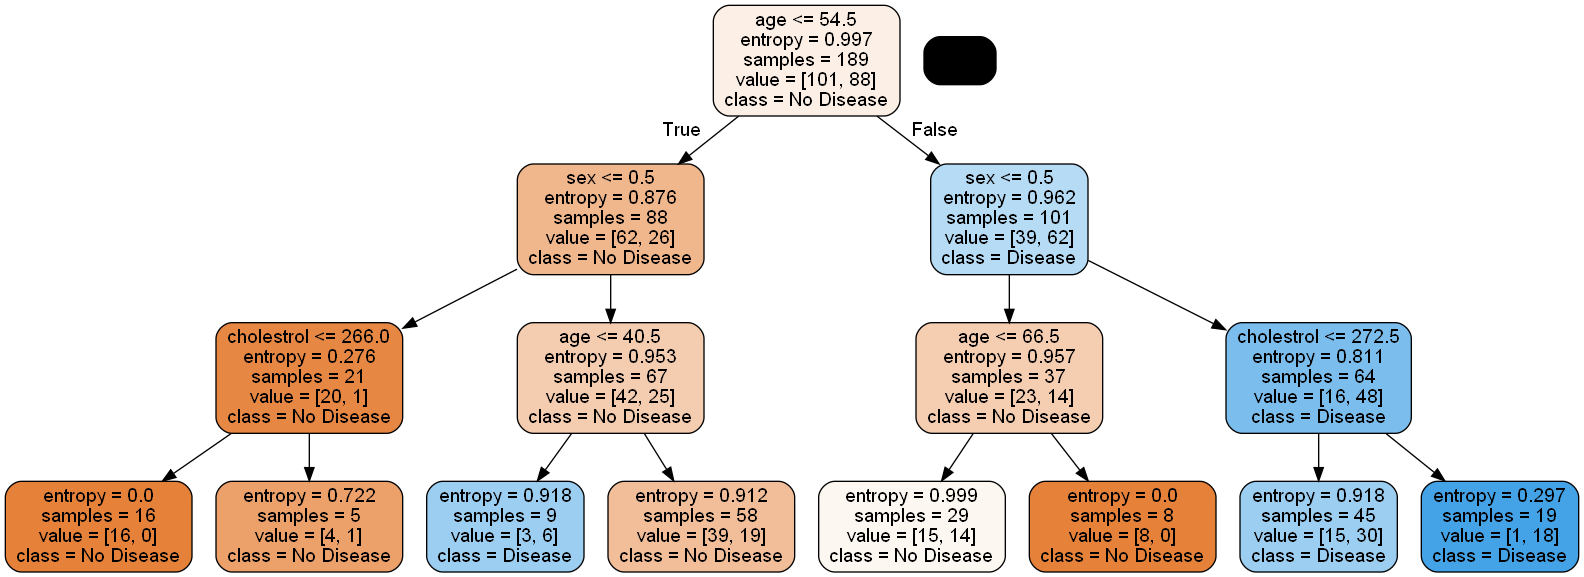

In [47]:
gph=get_dt_graph(dt_best)
Image(gph.create_png())